# Lending Club Case Study

## Problem Statement


You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

```
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
```

### By Ankush Garg & Pulkit Gangwar

In [1]:
# importing libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataframe settings to show every row and column in output
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


## 1. Data Understanding

In [3]:
# reading the loan.csv and data_dictionary.xlsx files

loan_df = pd.read_csv("./loan.csv", low_memory=False)
loan_dictionary_df = pd.read_excel("./Data_Dictionary.xlsx")

In [4]:
# Defining a function to get description from data_dictionary for a column 

def get_description(column):
    return loan_dictionary_df[loan_dictionary_df['LoanStatNew'] == column]['Description'].values[0]

In [5]:
# checking the columns in the dataset

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# Checking the number of rows and columns in the dataset.
print('Number of rows:', loan_df.shape[0])
print('Number of columns:', loan_df.shape[1])

Number of rows: 39717
Number of columns: 111


In [7]:
# Checking the datatypes, count, and null values in the dataset
loan_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

```
There are columns with null values. These columns will be handled in data cleaning section.
```

In [8]:
# Checking the statistical information on integer type columns.
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
# Checking the number of unique values for all the features
loan_df.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


```
There are several columns with a single unique value. These features will be handled in data cleaning.
```

## 2. Data Cleaning

In [10]:
# Checking unique values for loan_status
print("loan_status ->",get_description("loan_status"))
print(loan_df['loan_status'].unique())


loan_status -> Current status of the loan
['Fully Paid' 'Charged Off' 'Current']


### loan_status has three categories 
1. Fully Paid - People who have completed their loans.
2. Charged Off - People who defaulted their loans.
3. Current - People whose loans are still in progress.

- We clearly cannot perform any analysis on the rows where the loan_status is Current as their loan is still in progress, so we need to remove these rows from the dataset.


In [11]:
# removing all the rows where loan_status is 'Current' as it is not useful for analysis

print("Total rows before removal: ", loan_df.shape[0])
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]
print("Total rows after removal: ", loan_df.shape[0])

Total rows before removal:  39717
Total rows after removal:  38577


In [12]:
# Checking the percentage of null values in all the columns.
loan_df.isnull().mean()*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.185033
emp_length                          2.677761
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.472717
purpose                             0.000000
title                               0.028514
zip_code  

In [13]:
# Removing columns that have null values greater than or equal to 90%.

features_to_drop = [feature for feature in loan_df.columns if loan_df[feature].isnull().mean()*100 >= 90] 

loan_df.drop(features_to_drop,axis=1,inplace=True)

print("Number of columns removed: ", len(features_to_drop))
print('Total columns left: ', loan_df.shape[1])

Number of columns removed:  56
Total columns left:  55


In [14]:
# Checking the shape of dataset after the null value removal.
loan_df.shape

(38577, 55)

In [15]:
# checking some sample values for columns where nan values are greater than 30%.
print("Column Name: Null Percentage")
for column in  [feature for feature in loan_df.columns if loan_df[feature].isnull().mean()*100 >= 30]:
    print(column, ' : ' ,loan_df[column].isnull().mean()*100,"%")
    print(loan_df[column].sample(5))

Column Name: Null Percentage
desc  :  32.472716903854625 %
24000                                                  NaN
34334      560409 added on 10/20/09 > I have been emplo...
26337                                                  NaN
9883     I am purchasing a cabin that has 3 actual cabi...
25362      Borrower added on 09/23/10 > Two months rent...
Name: desc, dtype: object
mths_since_last_delinq  :  64.55919330170828 %
28959     NaN
35296     NaN
7121      NaN
36275     6.0
11318    62.0
Name: mths_since_last_delinq, dtype: float64


- desc column is the description given by the borrower during the time of loan application submission. We cannot derive any graphs from description column.

- mths_since_last_delinq has a lot of nan values we are removing this column as well.

In [16]:
# removing desc and mths_since_last_delinq columns.

loan_df.drop(['desc','mths_since_last_delinq'],axis=1,inplace=True)

In [17]:
# checking the shape of the data after column removal

loan_df.shape

(38577, 53)

- Customer behavior variables will not be available at the time of loan processing so we cannot use them to analyse loan defaults.

In [18]:
# Removing the customer behavior columns that are not available during the loan application phase.

total_columns_before_customer_behavior_variables = loan_df.shape[1]
loan_df.drop(["delinq_2yrs",
"earliest_cr_line",
"inq_last_6mths",
"open_acc",
"pub_rec",
"revol_bal",
"revol_util",
"total_acc",
"out_prncp",
"out_prncp_inv",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d",
"application_type"], axis=1,inplace=True)

print('Columns removed:', total_columns_before_customer_behavior_variables - loan_df.shape[1])

Columns removed: 21


In [19]:
# checking the shape of the data after column removal

loan_df.shape

(38577, 32)

#### Removing redundant variables

- columns like "tax_liens",
    "initial_list_status",               
    "collections_12_mths_ex_med",        
    "policy_code",                       
    "acc_now_delinq" ,                   
    "chargeoff_within_12_mths",          
    "delinq_amnt"
    "pymnt_plan" only have a single unique value. 
- columns like  "id",
    "member_id",
    "emp_title",
    "url",
    "title" will not be useful for analysis.
- column "zip_code" is also redundant because we already have a column for location "addr_state".

In [20]:
# Removing redundant columns from the dataset.

total_columns_before_useless_features_removal = loan_df.shape[1]

loan_df.drop([
    "id",
    "member_id",
    "emp_title",
    "url",
    "title",
    "zip_code",
    "tax_liens",
    "initial_list_status",               
    "collections_12_mths_ex_med",        
    "policy_code",                       
    "acc_now_delinq" ,                   
    "chargeoff_within_12_mths",          
    "delinq_amnt",
    "pymnt_plan"                       
],axis=1,inplace=True)

print("Columns Removed: ", total_columns_before_useless_features_removal - loan_df.shape[1])

Columns Removed:  14


In [21]:
# checking the shape of the data after column removal

loan_df.shape

(38577, 18)

In [22]:
# checking for nan value percentage after column removal
loan_df.isnull().mean()*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

- emp_length and pub_rec_bankruptcies have very few null values so we can remove the rows where these values are null.

In [23]:
# removing rows where emp_length is null 
total_rows = len(loan_df)
loan_df = loan_df[~(loan_df['emp_length'].isnull())]
print("Rows removed: ", total_rows - len(loan_df))

Rows removed:  1033


In [24]:
# removing rows where pub_rec_bankruptcies is null 
total_rows = len(loan_df)
loan_df = loan_df[~(loan_df['pub_rec_bankruptcies'].isnull())]
print("Rows removed: ", total_rows - len(loan_df))

Rows removed:  697


In [25]:
# checking null values in the dataset.

loan_df.isnull().mean()*100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [26]:
# Converting the int_rate column type from object to float64 for ease in analysis.

loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.replace("%","")))

In [27]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

## 3. Univariate Analysis


In [28]:
# checking the columns in the dataset.
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


##### loan_amnt, funded_amnt, funded_amnt_inv

In [29]:
# Checking description for loan_amnt, funded_amnt, funded_amnt_inv

print('Description: ')
for column in ['loan_amnt','funded_amnt','funded_amnt_inv']:
    print(column, ": ", get_description(column))
    

Description: 
loan_amnt :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt :  The total amount committed to that loan at that point in time.
funded_amnt_inv :  The total amount committed by investors for that loan at that point in time.


In [30]:
# checking the min and max values for loan_amnt column for bins

loan_df['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [31]:
# binning the loan_amnt column for ease in analysis
loan_amounts_bins = [0,5000,10000,15000,20000,25000,30000,35000]
loan_amounts_labels = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']

loan_df['loan_amounts'] = pd.cut(x=loan_df['loan_amnt'],bins=loan_amounts_bins,labels=loan_amounts_labels,include_lowest=True)

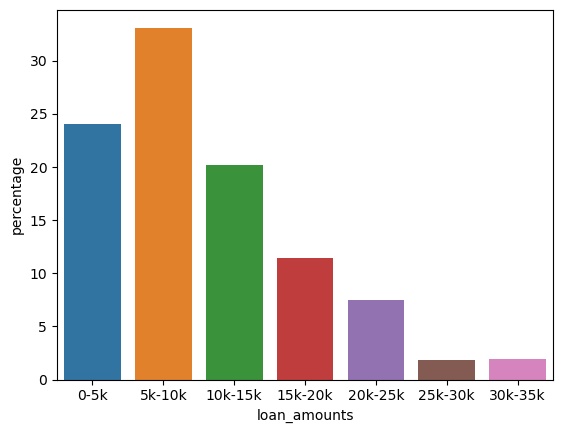

In [32]:
# plotting bar plot for loan_amounts categorical data
loan_amounts_series = loan_df['loan_amounts'].value_counts(normalize=True).mul(100)

fig = sns.barplot(x=loan_amounts_series.index,y=loan_amounts_series.values)
fig.set(xlabel='loan_amounts',ylabel='percentage')
plt.show()

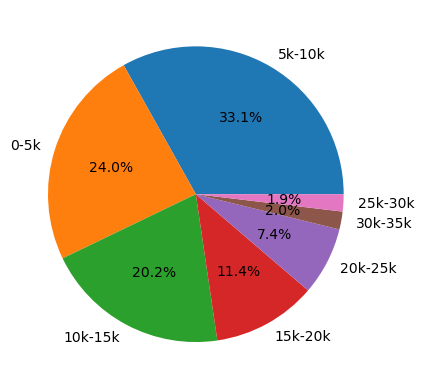

In [33]:
# plotting pie plot for loan_amounts categorical data
plt.pie(x=loan_amounts_series.values,labels=loan_amounts_series.index, autopct='%1.1f%%')
plt.show()

```
About 33% borrowers have loan amount between 5000 to 10000
```

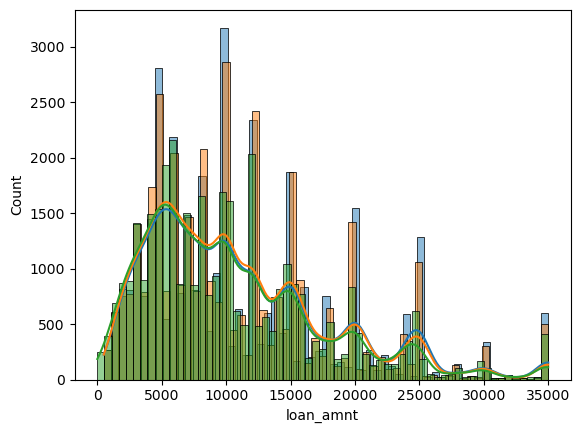

In [34]:
# plotting stacked histogram on loan_amnt, funded_amnt, funded_amnt_inv

sns.histplot(data=loan_df,x='loan_amnt',kde=True)
sns.histplot(data=loan_df,x='funded_amnt',kde=True)
sns.histplot(data=loan_df,x='funded_amnt_inv',kde=True)
plt.show()

```
loan_amnt, funded_amnt, funded_amnt_inv don't have much difference between them. We can use only one column for further analysis
```

##### term

In [35]:
# Checking description for column term

print("Description: ")
print("term: ",get_description("term"))

Description: 
term:  The number of payments on the loan. Values are in months and can be either 36 or 60.


[Text(0.5, 0, 'term'), Text(0, 0.5, 'count')]

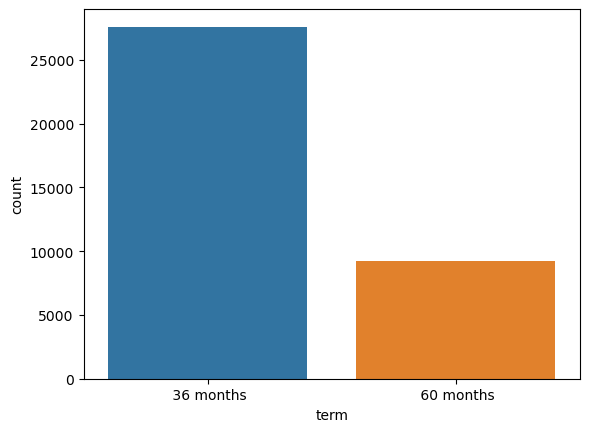

In [36]:
# checking the count for each category 

term_series = loan_df['term'].value_counts()

fig = sns.barplot(x=term_series.index,y=term_series.values)
fig.set(xlabel='term',ylabel='count')

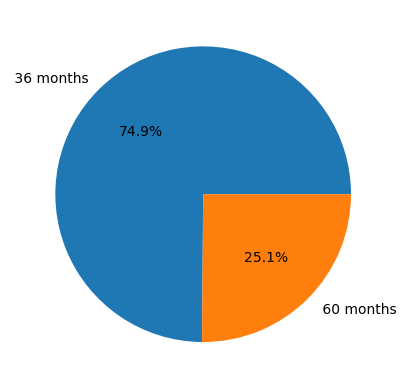

In [37]:
# checking how much percent loan count does each term category have.
term_series_percentage = loan_df['term'].value_counts()

plt.pie(x=term_series_percentage.values,labels=term_series_percentage.index,autopct='%1.1f%%')
plt.show()

```
Most of the loans were given for 36 months term.
```

##### int_rate

In [38]:
# checking description for int_rate
print("Description: ")
print("int_rate: ",get_description("int_rate"))

Description: 
int_rate:  Interest Rate on the loan


In [39]:
loan_df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [40]:
# creating bins for int_rate for ease in analysis
int_rate_bins = [5.0,7.5,10.0,12.5,15.0,17.5,20.0,22.5,25.0]
int_rate_bins_labels = ['5.0%-7.5%','7.5%-10.0%','10.0%-12.5%',"12.5%-15.0%",'15.0%-17.5%','17.5%-20.0%','20.0%-22.5%','22.5%-25.0%']

loan_df['int_rates'] = pd.cut(x=loan_df['int_rate'],bins=int_rate_bins,labels=int_rate_bins_labels,include_lowest=True)

In [41]:
# checking the value counts for int_rates derived categorical variable

loan_df['int_rates'].value_counts()

10.0%-12.5%    8889
12.5%-15.0%    8604
7.5%-10.0%     6473
5.0%-7.5%      5072
15.0%-17.5%    4989
17.5%-20.0%    2060
20.0%-22.5%     695
22.5%-25.0%      65
Name: int_rates, dtype: int64

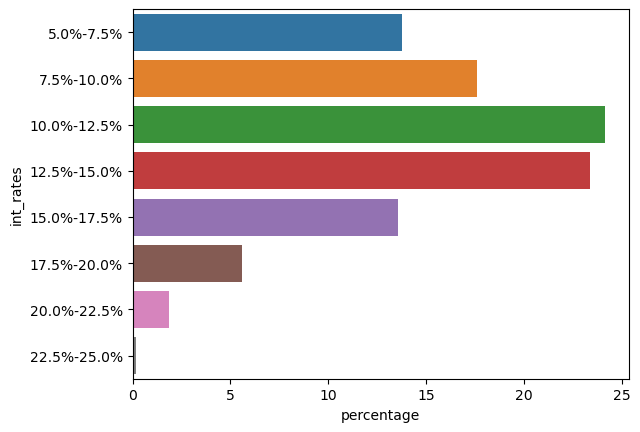

In [42]:
# checking the percentage value for each int_rates category with bar plot.
percentage_for_int_rates = loan_df['int_rates'].value_counts(normalize=True).mul(100)

fig = sns.barplot(y=percentage_for_int_rates.index,x=percentage_for_int_rates.values)
fig.set(xlabel='percentage',ylabel='int_rates')
plt.show()

```
Most int_rate offered on the loan are in between 10% to 12.5%
```

##### installment

In [43]:
# Checking description for installment.
print("Description:")
print("installment: ",get_description("installment"))

Description:
installment:  The monthly payment owed by the borrower if the loan originates.


In [44]:
# checking the min and max value for making categorical bins
loan_df['installment'].describe()

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

In [45]:
# Making a bins for installment for ease in analysis

installment_bins = [0,200,400,600,800,1000,1200]
installment_bins_labels = ['0-200','200-400','400-600','600-800','800-1000','1000-1200']

loan_df['installments'] = pd.cut(x=loan_df['installment'],bins=installment_bins,labels=installment_bins_labels,include_lowest=True)

In [46]:
# checking the distribution of installments column with percentages

loan_df['installments'].value_counts(normalize=True)

200-400      0.384381
0-200        0.334149
400-600      0.172715
600-800      0.069042
800-1000     0.035010
1000-1200    0.004702
Name: installments, dtype: float64

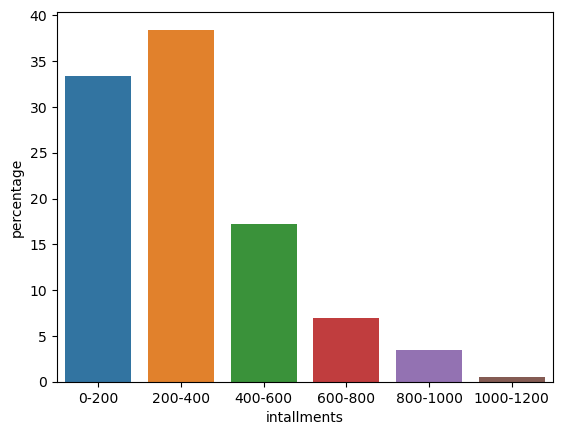

In [47]:
# plotting a bar plot for installments categorical column with percentages

percentage_of_installments = loan_df['installments'].value_counts(normalize=True).mul(100)

fig = sns.barplot(x=percentage_of_installments.index,y=percentage_of_installments.values)
fig.set(xlabel='intallments',ylabel='percentage')
plt.show()

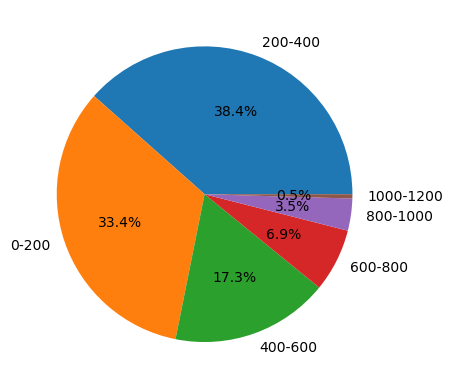

In [48]:
# plotting a pie plot for installments categorical column with percentages

plt.pie(x=percentage_of_installments.values,labels=percentage_of_installments.index, autopct='%1.1f%%')
plt.show()

```
Most installments offered are in between 200 to 400 
```

##### grade

In [49]:
# Checking description for grade column.
print("Description: ")
print("grade: ", get_description("grade"))

Description: 
grade:  LC assigned loan grade


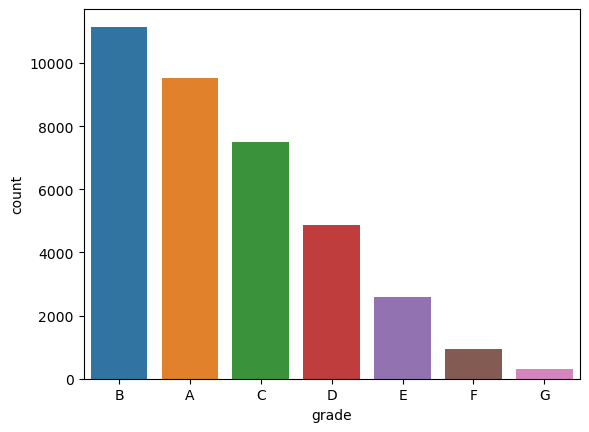

In [50]:
# checking the count each grade category have with bar plot.

grade_series = loan_df['grade'].value_counts()

fig = sns.barplot(x=grade_series.index,y=grade_series.values)
fig.set(xlabel='grade',ylabel='count')
plt.show()

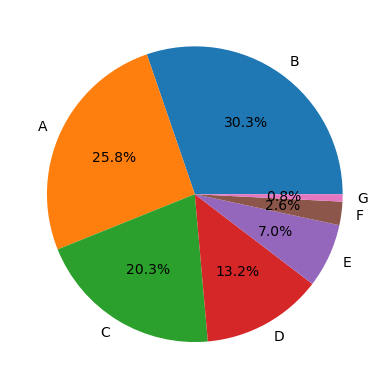

In [51]:
# checking the percentage each grade category have with pie plot.
grade_series_percentage = loan_df['grade'].value_counts(normalize=True)

plt.pie(x=grade_series_percentage.values,labels=grade_series_percentage.index,autopct='%1.1f%%')
plt.show()

```
Most loans are of grade B followed by A and C
```

##### sub_grade

In [52]:
# checking the description for sub_grade column
print("Description:")
print("sub_grade: ", get_description("sub_grade"))

Description:
sub_grade:  LC assigned loan subgrade


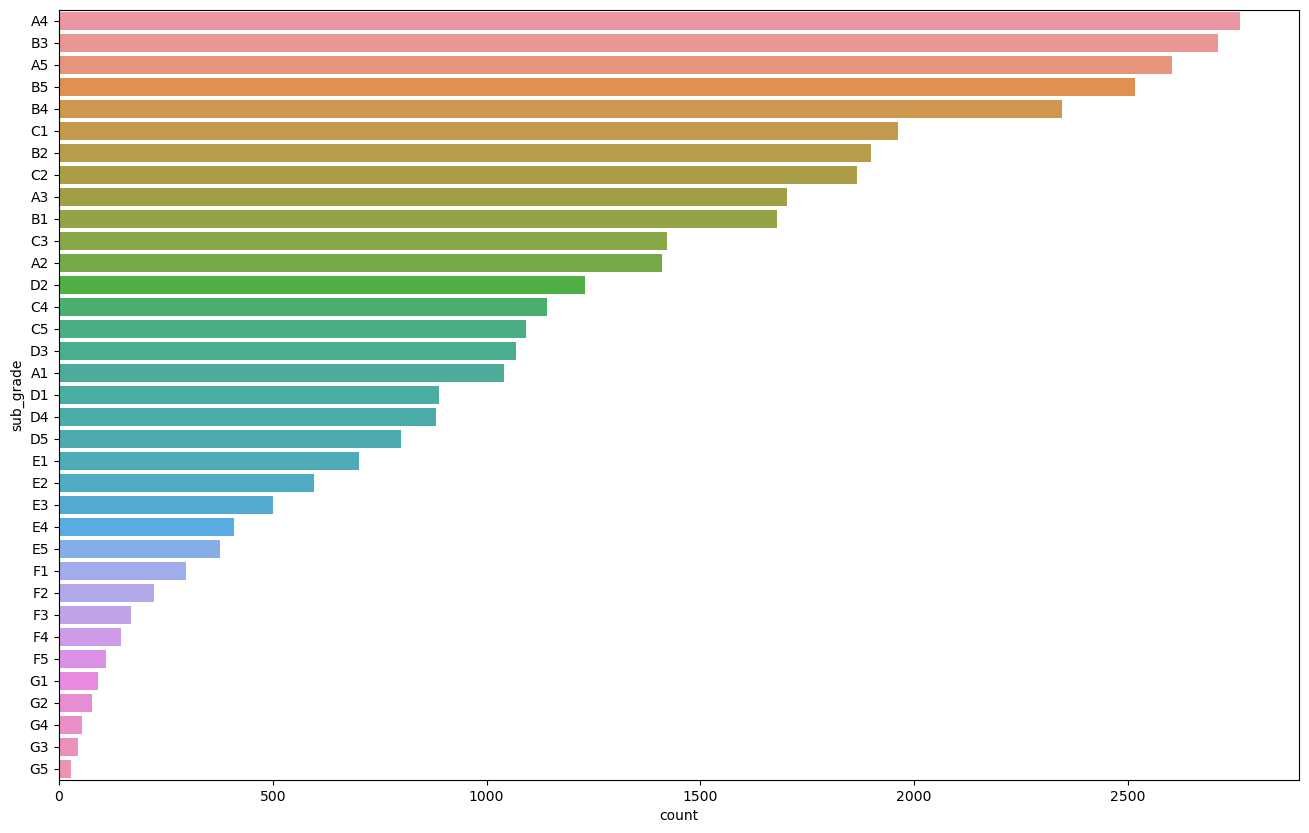

In [53]:
# checking the count of loans for each sub_grade category.

plt.figure(figsize=(16,10))
sub_grade_series = loan_df['sub_grade'].value_counts()
sgs_plot = sns.barplot(y=sub_grade_series.index,x=sub_grade_series.values)
sgs_plot.set(xlabel='count',ylabel='sub_grade')
plt.show()


```
Most loans have a sub grade of A4 followed by B3 and A5
```

##### emp_length

In [54]:
# Checking the description for emp_length column
print("Description: ")
print("emp_length: ",get_description("emp_length"))

Description: 
emp_length:  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


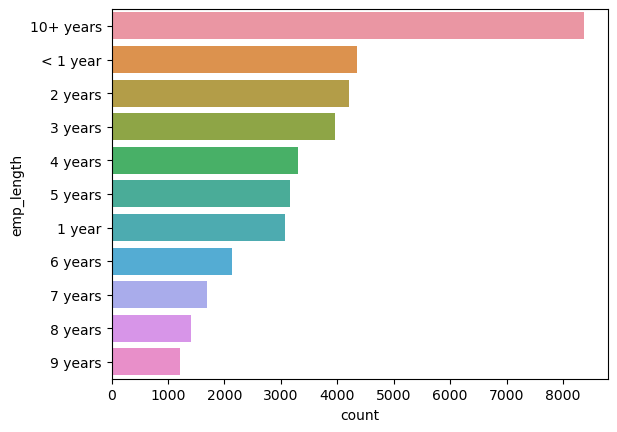

In [55]:
# checking the count of loans each emp_length category have with bar plot.
emp_length_series = loan_df['emp_length'].value_counts()

fig = sns.barplot(y=emp_length_series.index,x=emp_length_series.values)
fig.set(xlabel='count',ylabel='emp_length')

plt.show()

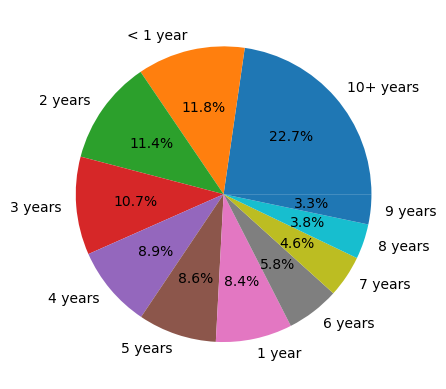

In [56]:
# checking the percentage value each emp_length category have with pie plot. 
emp_length_series_percentage = loan_df['emp_length'].value_counts(normalize=True)

plt.pie(x=emp_length_series_percentage.values,labels=emp_length_series_percentage.index,autopct='%1.1f%%')
plt.show()

```
About 22% borrowers have a employment length of greater than 10 years
```

##### home_ownership

In [57]:
# checking the description for home_ownership column.
print("Description:")
print("home_ownership: ",get_description("home_ownership"))

Description:
home_ownership:  The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


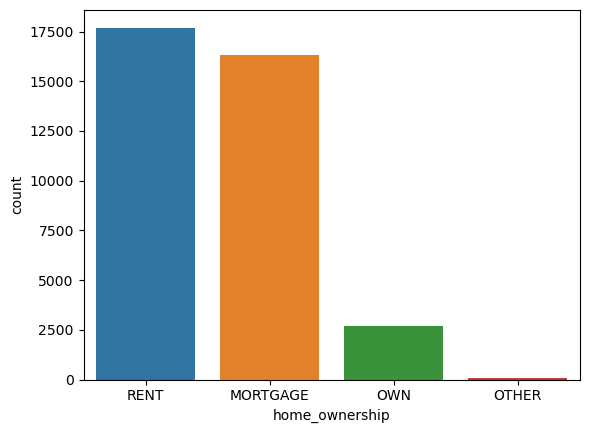

In [58]:
# checking the count for each home_ownership category with bar plot.
home_ownership_series = loan_df['home_ownership'].value_counts()
fig = sns.barplot(x=home_ownership_series.index,y=home_ownership_series.values)
fig.set(xlabel='home_ownership',ylabel='count')
plt.show()

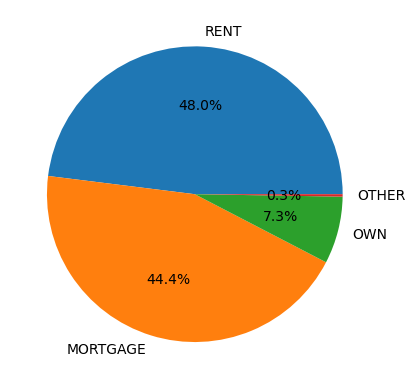

In [59]:
# checking the percentage value for each home_ownership category with pie plot.
home_ownership_percentage_series = loan_df['home_ownership'].value_counts(normalize=True)
plt.pie(x=home_ownership_percentage_series.values,labels=home_ownership_percentage_series.index,autopct='%1.1f%%')
plt.show()

```
Borrowers with rented homes and homes with mortgage have higher number of loans.
```

##### annual_inc

In [60]:
# checking description for annual_inc column.
print("Description: ")
print("annual_inc: ",get_description("annual_inc"))

Description: 
annual_inc:  The self-reported annual income provided by the borrower during registration.


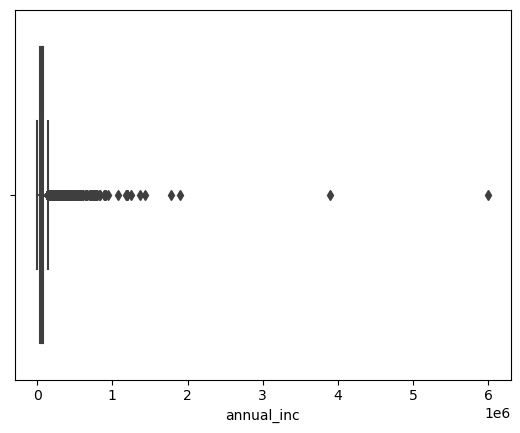

In [61]:
# checking for outliers in annual income

sns.boxplot(data=loan_df,x='annual_inc')
plt.show()

- Clearly 95 percentile seems to be disconnected

In [62]:
# removing the 95 percentile values

loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df['annual_inc'] <= loan_df['annual_inc'].quantile(0.95)]

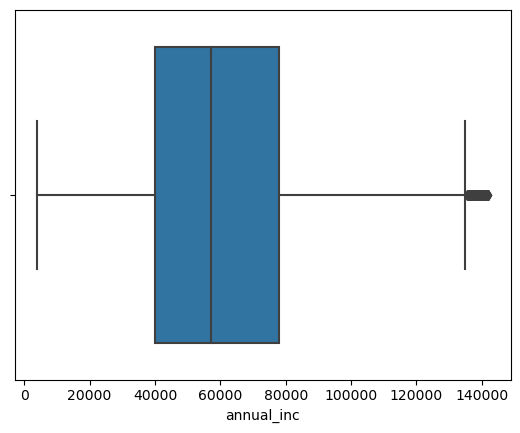

In [63]:
# checking annual_inc after outlier removal

sns.boxplot(data=loan_df,x='annual_inc')
plt.show()

In [64]:
# checking the min and max value for annual income for making categorical bins

loan_df['annual_inc'].describe()

count     35004.000000
mean      61504.320615
std       27721.596147
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

In [65]:
# Creating bins for annual_inc for ease in analysis

annual_inc_bins = [0,20000,40000,60000,80000,100000,120000,140000]
annual_inc_bins_labels = ['0-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k']

loan_df['annual_incomes'] = pd.cut(x=loan_df['annual_inc'],bins=annual_inc_bins,labels=annual_inc_bins_labels,include_lowest=True)

In [66]:
# checking the value counts for annual incomes categorical column

loan_df['annual_incomes'].value_counts(normalize=True).mul(100)

40k-60k      30.960824
20k-40k      22.719474
60k-80k      21.089505
80k-100k     12.570775
100k-120k     6.456963
120k-140k     3.431513
0-20k         2.770947
Name: annual_incomes, dtype: float64

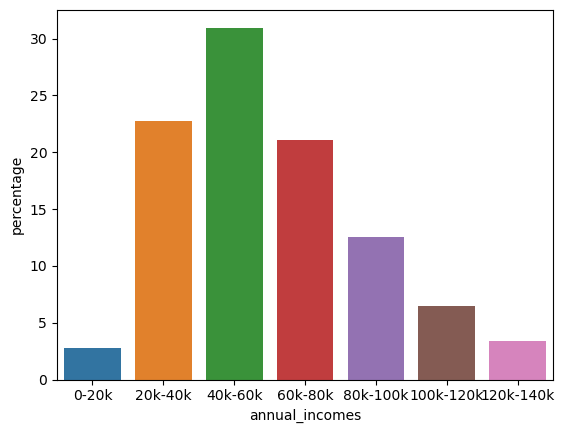

In [67]:
# plotting bar plot for categorical data annual_incomes

percentage_of_annual_incomes = loan_df['annual_incomes'].value_counts(normalize=True).mul(100)

fig = sns.barplot(x=percentage_of_annual_incomes.index,y=percentage_of_annual_incomes.values)
fig.set(xlabel='annual_incomes',ylabel='percentage')
plt.show()

```
Most borrowers with loans have annual income in between 40000 to 60000
```

##### verification_status

In [68]:
# checking description for verification_status column.

print("Description: ")
print("verification_status: ",get_description("verification_status") )

Description: 
verification_status:  Indicates if income was verified by LC, not verified, or if the income source was verified


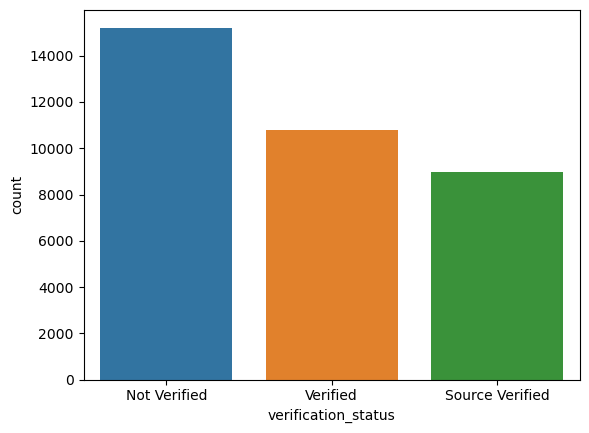

In [69]:
# checking count for each verification_status category with bar plot.
verification_status_series = loan_df['verification_status'].value_counts()

fig = sns.barplot(x=verification_status_series.index,y=verification_status_series.values)
fig.set(xlabel='verification_status',ylabel='count')
plt.show()

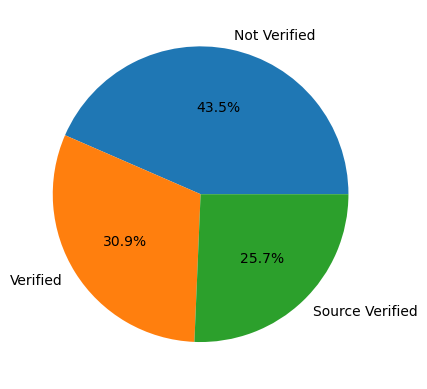

In [70]:
# checking percentage for each verification_status category with pie plot.
verification_status_series_percentage = loan_df['verification_status'].value_counts(normalize=True)

plt.pie(x=verification_status_series_percentage.values,labels=verification_status_series_percentage.index,autopct='%1.1f%%')
plt.show()

```
About 42% borrowers annual incomes are not verified.
```

##### issue_d

In [71]:
# checking description for issue_d column.
print("Description: ")
print("issue_d:", get_description("issue_d"))

Description: 
issue_d: The month which the loan was funded


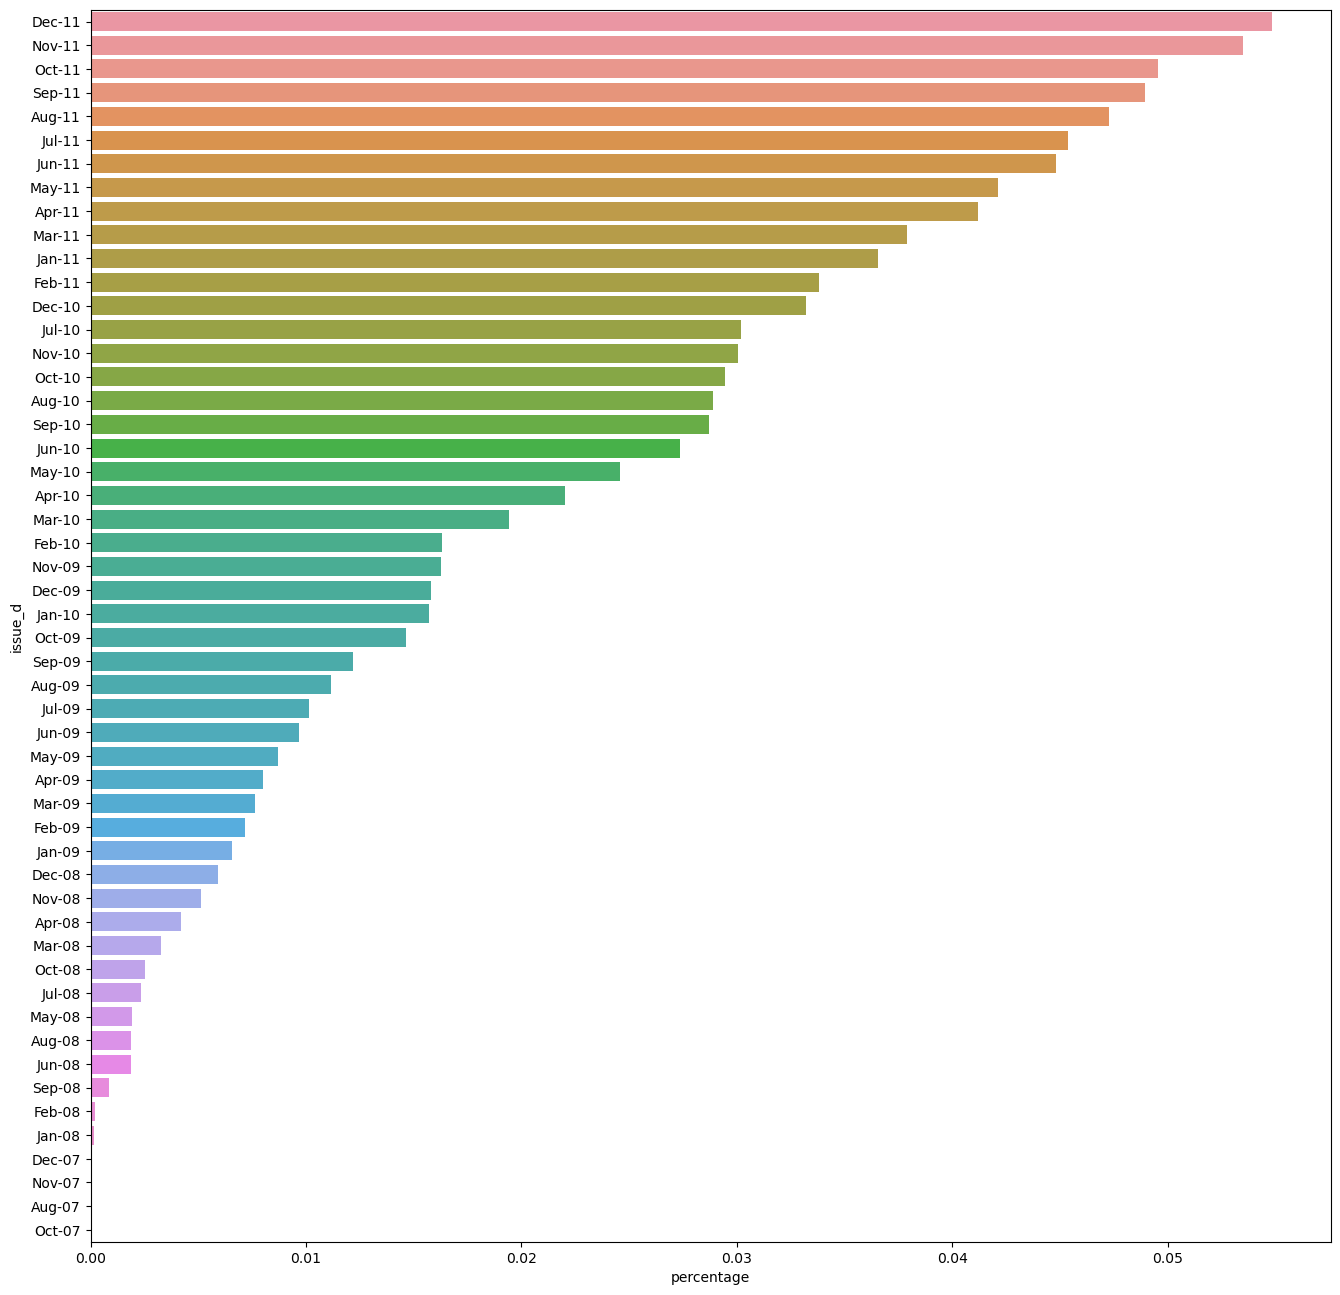

In [72]:
# checking the percentage for each issue_d category with bar plot.
issue_d_series = loan_df['issue_d'].value_counts(normalize=True)

plt.figure(figsize=(16,16))
fig = sns.barplot(y=issue_d_series.index,x=issue_d_series.values)
fig.set(ylabel='issue_d',xlabel='percentage')
plt.show()

##### loan_status

In [73]:
# checking description for loan_status column.
print("Description: ")
print("loan_status: ",get_description("loan_status"))

Description: 
loan_status:  Current status of the loan


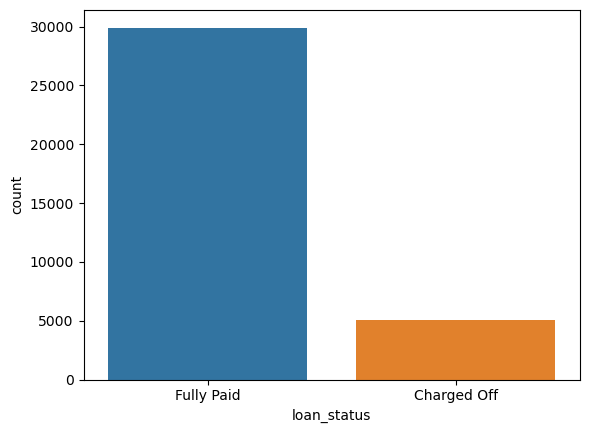

In [74]:
# checking count for each loan_status category with bar plot.
loan_status_series = loan_df['loan_status'].value_counts()

fig = sns.barplot(x=loan_status_series.index,y=loan_status_series.values)
fig.set(xlabel='loan_status',ylabel='count')
plt.show()

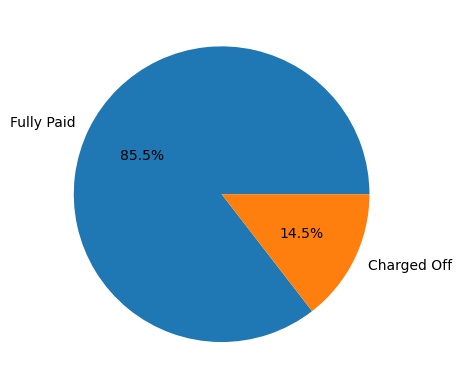

In [75]:
# checking percentage value for each loan_status category with pie plot. 
loan_status_series_percentage = loan_df['loan_status'].value_counts(normalize=True)

plt.pie(x=loan_status_series_percentage.values,labels=loan_status_series_percentage.index,autopct='%1.1f%%')
plt.show()

```
About 85% borrowers have Fully paid back the loan.
```

##### purpose

In [76]:
# checking the description for purpose column.
print("Description: ")
print("purpose: ",get_description("purpose"))

Description: 
purpose:  A category provided by the borrower for the loan request. 


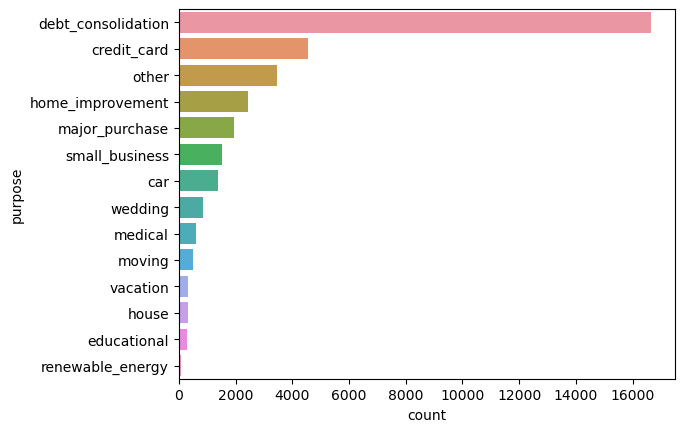

In [77]:
# checking the count for each purpose category with bar plot.
purpose_series = loan_df['purpose'].value_counts()

ps_plot = sns.barplot(y=purpose_series.index,x=purpose_series.values)
ps_plot.set(xlabel='count',ylabel='purpose')
plt.show()

In [78]:
# checking the percentage value for each purpose category.
loan_df['purpose'].value_counts(normalize=True)*100

debt_consolidation    47.571706
credit_card           13.049937
other                  9.853160
home_improvement       6.953491
major_purchase         5.599360
small_business         4.385213
car                    3.956691
wedding                2.471146
medical                1.745515
moving                 1.479831
vacation               0.948463
house                  0.917038
educational            0.819906
renewable_energy       0.248543
Name: purpose, dtype: float64

```
About 47% borrowers have taken loan for debt consolidation.
```

##### addr_state

In [79]:
# checking the description for addr_state. 
print("Description:")
print("addr_state:", get_description("addr_state"))

Description:
addr_state: The state provided by the borrower in the loan application


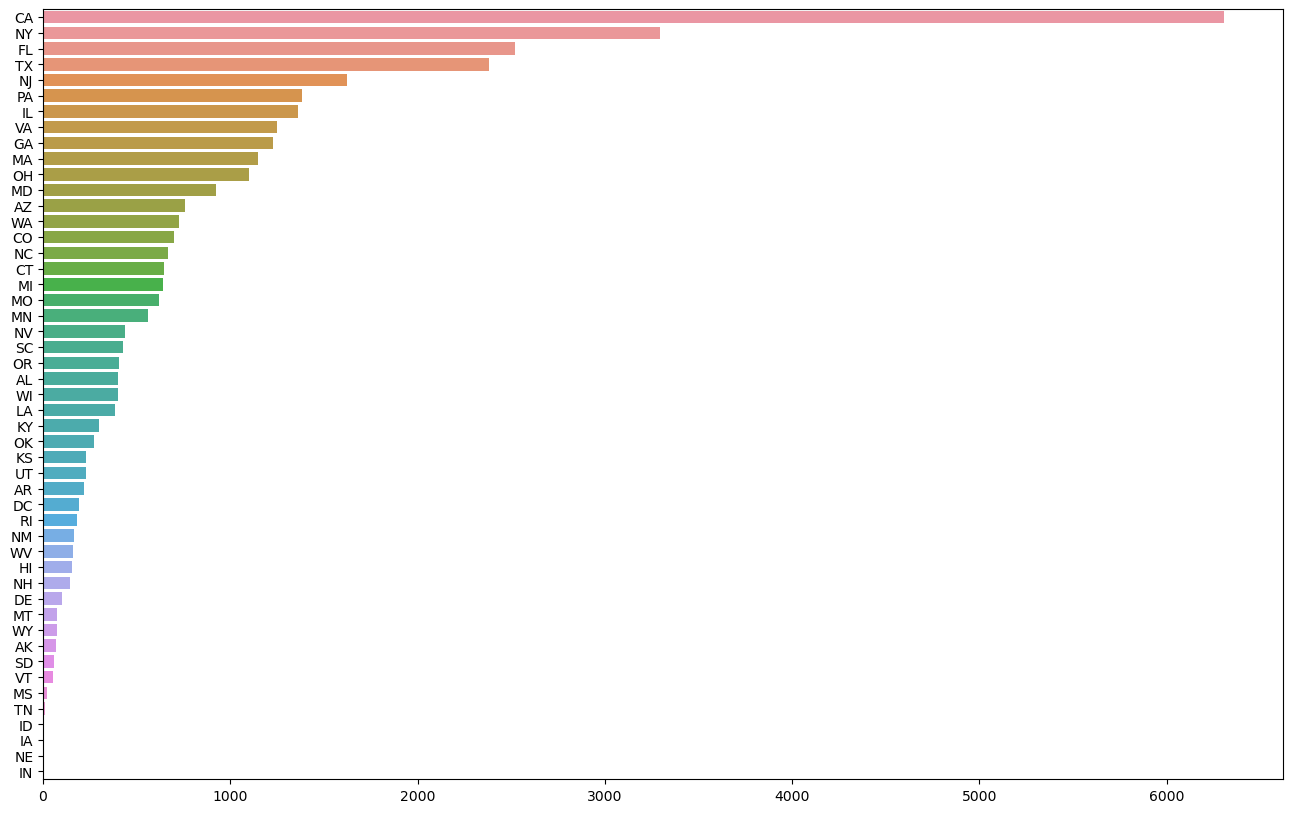

In [80]:
# checking the count for each addr_state category with bar plot.
addr_state_count = loan_df['addr_state'].value_counts()
plt.figure(figsize=(16,10))
sns.barplot(y=addr_state_count.index,x=addr_state_count.values)
plt.show()

```
Most loans are from addr_state CA followed by NY
```

##### dti

In [81]:
# checking the description for dti column.

print("Description:")
print("dti:", get_description("dti"))

Description:
dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [82]:
# checking the min and max value for dti to make bins

loan_df['dti'].describe()

count    35004.000000
mean        13.502557
std          6.642285
min          0.000000
25%          8.420000
50%         13.640000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

In [83]:
# Creating bins for dti for ease in analysis

dti_bins = [0,5,10,15,20,25,30]
dti_bins_labels = ['0-5','5-10','10-15','15-20','20-25','25-30']

loan_df['dtis'] = pd.cut(x=loan_df['dti'],bins=dti_bins,labels=dti_bins_labels, include_lowest=True)

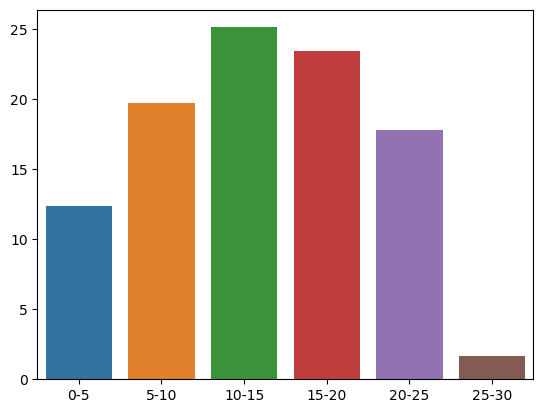

In [84]:
# checking the percentage value for each dtis category with bar plot.
dti_percentage = loan_df['dtis'].value_counts(normalize=True).mul(100)

sns.barplot(x=dti_percentage.index,y=dti_percentage.values)
plt.show()

```
Most borrowers have a dti score between 10 to 15
```

##### pub_rec_bankruptcies

In [85]:
# checking the description for pub_rec_bankruptcies column.
print("Description: ")
print("pub_rec_bankruptcies: ",get_description("pub_rec_bankruptcies"))

Description: 
pub_rec_bankruptcies:  Number of public record bankruptcies


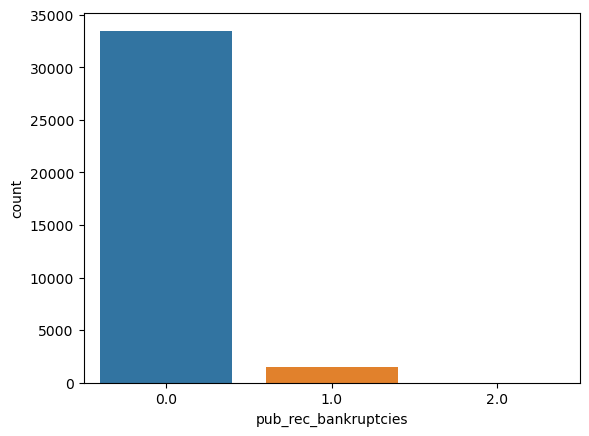

In [86]:
# checking the count for each pub_rec_bankruptcies with bar plot.
pub_rec_bankruptcies_series = loan_df['pub_rec_bankruptcies'].value_counts()

fig = sns.barplot(x=pub_rec_bankruptcies_series.index,y=pub_rec_bankruptcies_series.values)
fig.set(xlabel='pub_rec_bankruptcies',ylabel='count')
plt.show()

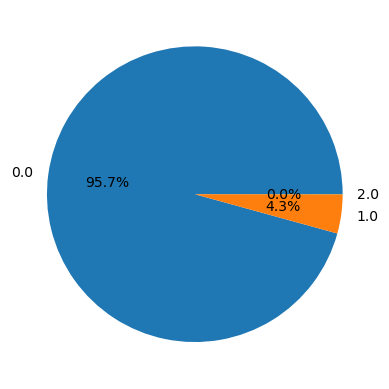

In [87]:
# checking the percentage value for each pub_rec_bankrupticies category with pie plot.
pub_rec_bankruptcies_series_percentage = loan_df['pub_rec_bankruptcies'].value_counts(normalize=True)

plt.pie(x=pub_rec_bankruptcies_series_percentage.values,labels=pub_rec_bankruptcies_series_percentage.index,autopct='%1.1f%%')
plt.show()

```
About 95% borrowers have no bankruptcies and 4% borrowers have a single bankruptcy.
```

## 4. Bivariate Analysis

In [88]:
# defining a function to plot bar plot between a categorical column and loan_status

def get_graph_for_categorical_data(column, rotate = False,horizontal = False):
    plt.figure(figsize=(16,10))
    column_grouped_df = loan_df.groupby([column])["loan_status"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()

    if horizontal:
        cgd_plot = sns.barplot(data=column_grouped_df,y=column,x='percentage',hue='loan_status')
    else:
        cgd_plot = sns.barplot(data=column_grouped_df,x=column,y='percentage',hue='loan_status')

    if rotate:
        cgd_plot.set_xticklabels(cgd_plot.get_xticklabels(),rotation=90)
    plt.show()

##### loan_amnt

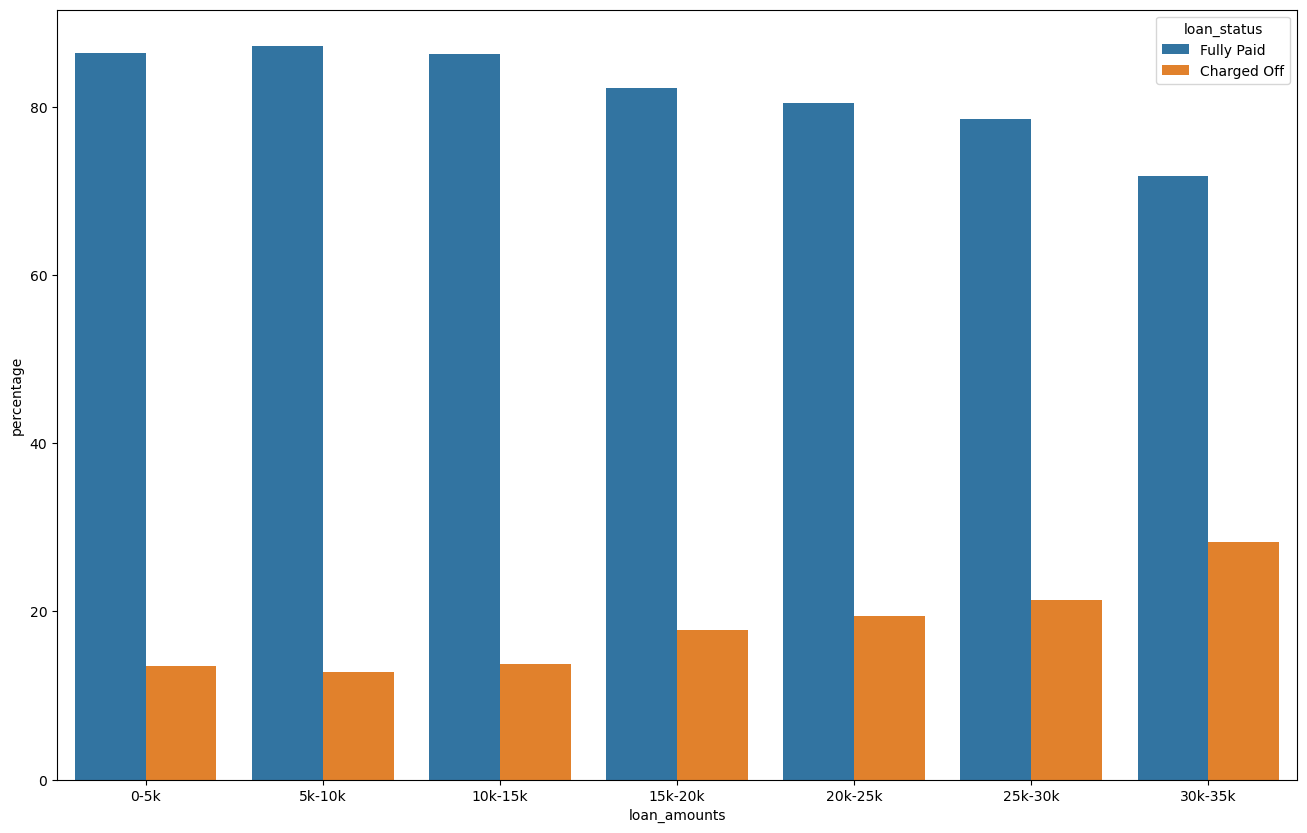

In [89]:
# plotting bar plot for loan_amounts categorical data with hue as loan_status

get_graph_for_categorical_data("loan_amounts")

```
loan amount greater than 15000 have higher defaults. As the loan amount is increasing after 15000 so is the default rate.
```

##### term

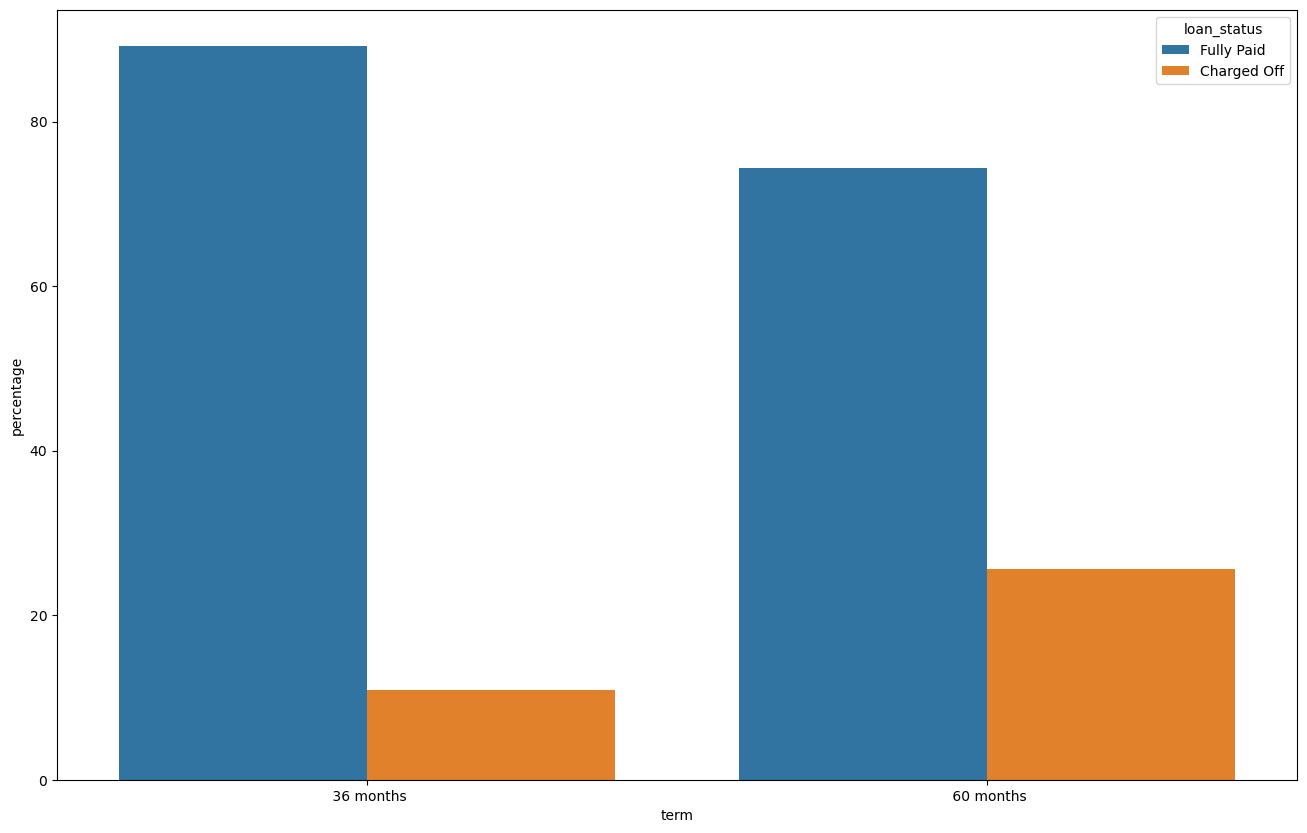

In [90]:
# plotting bar plot for term categorical data with hue as loan_status

get_graph_for_categorical_data("term")


```
60 months term have more defaults as compared to 36 months term
```

##### grade

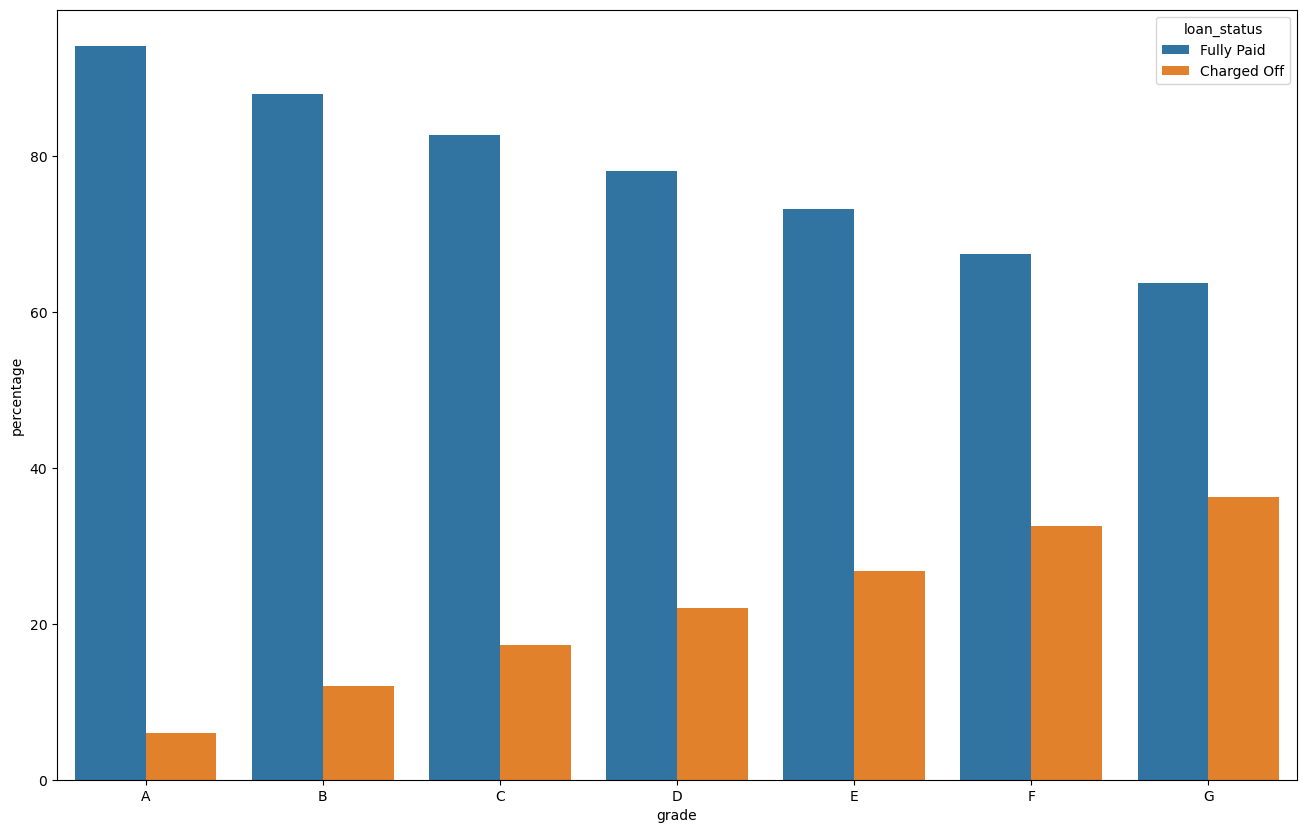

In [91]:
# plotting bar plot for grade categorical data with hue as loan_status
get_graph_for_categorical_data("grade")


```
Grade G and F have more defaults as compared to other grades.
As the grades are increasing, defaults are also increasing with it.
```

##### sub_grade

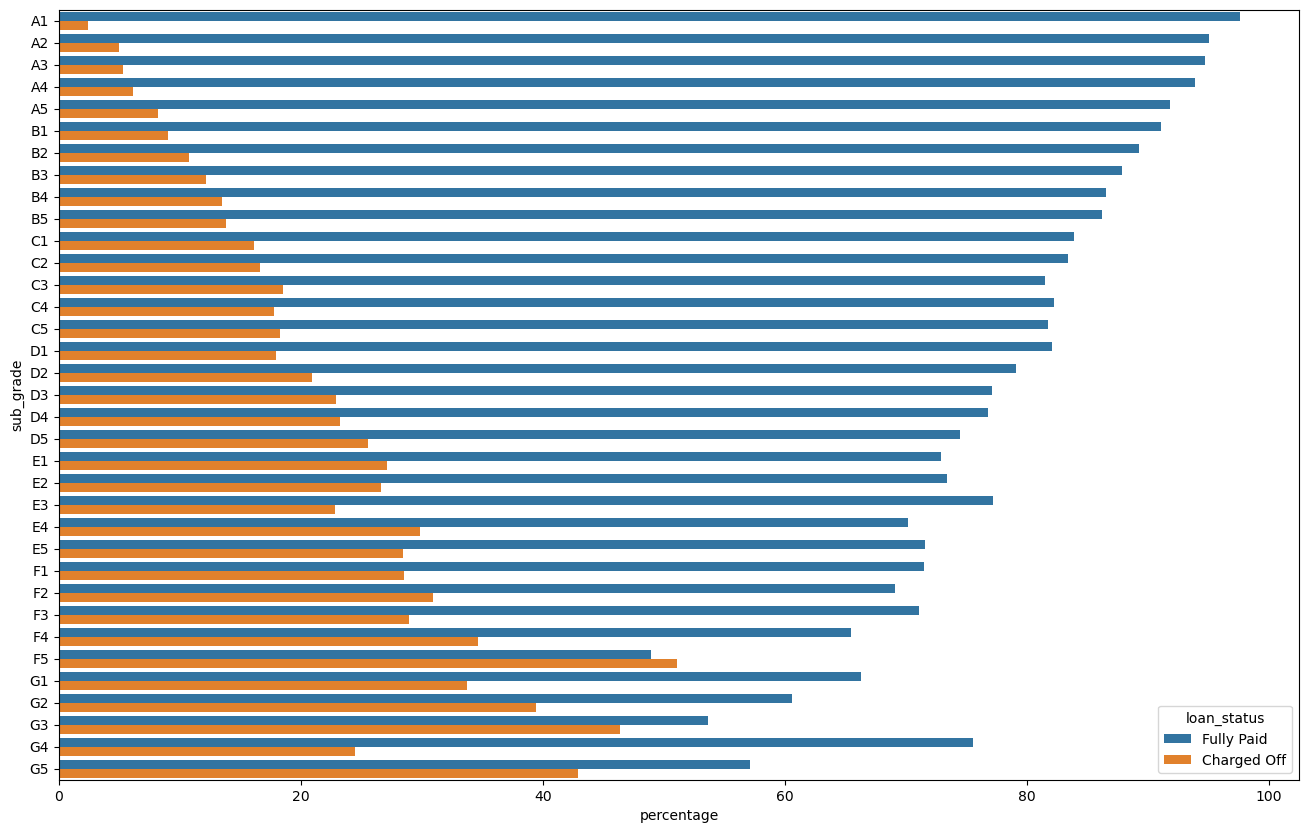

In [92]:
# plotting bar plot for sub_grade categorical data with hue as loan_status
get_graph_for_categorical_data("sub_grade",horizontal=True)

```
Sub grades F5, G3 and F4 have more defaults as compared to other sub grades
```

##### emp_length

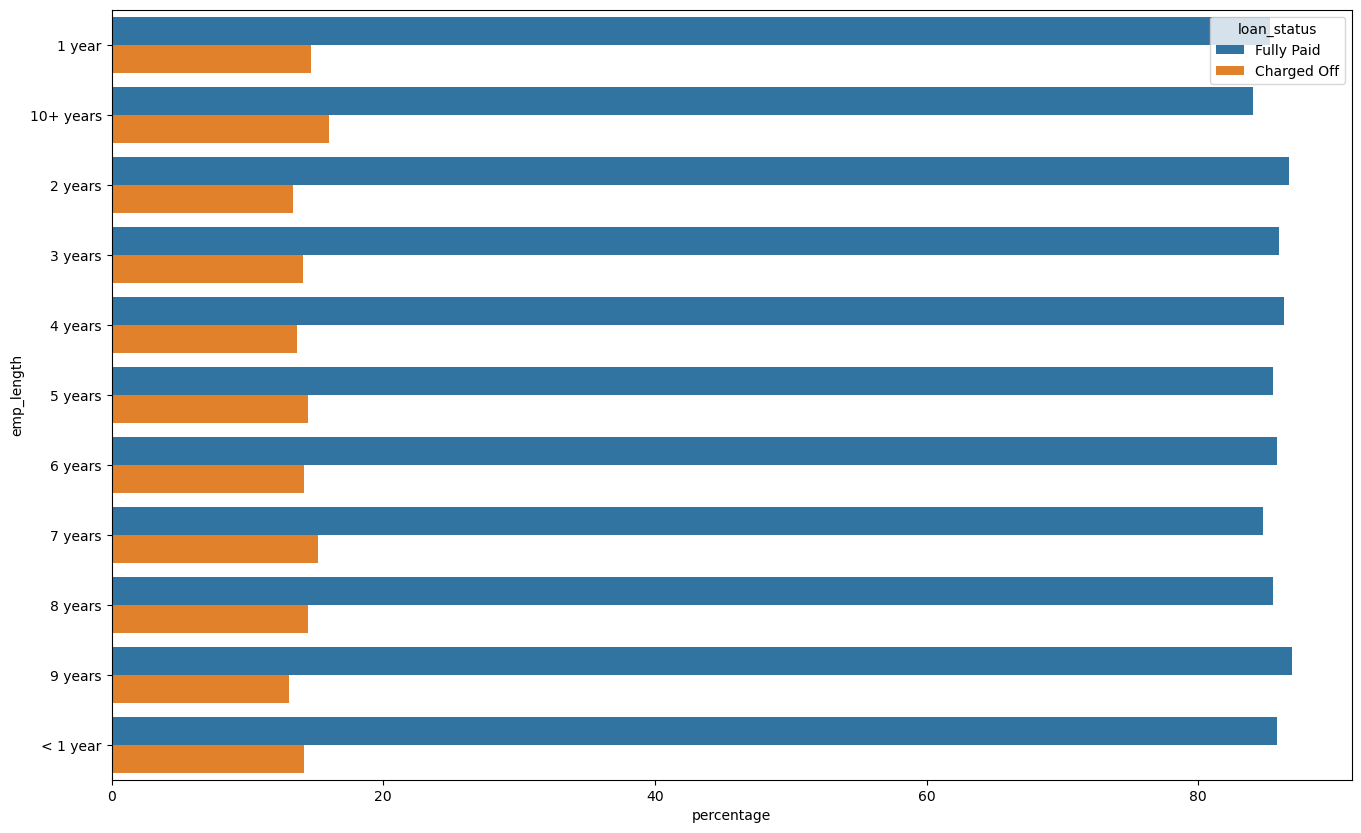

In [93]:
# plotting bar plot for emp_length categorical data with hue as loan_status
get_graph_for_categorical_data("emp_length",horizontal=True)

##### home_ownership

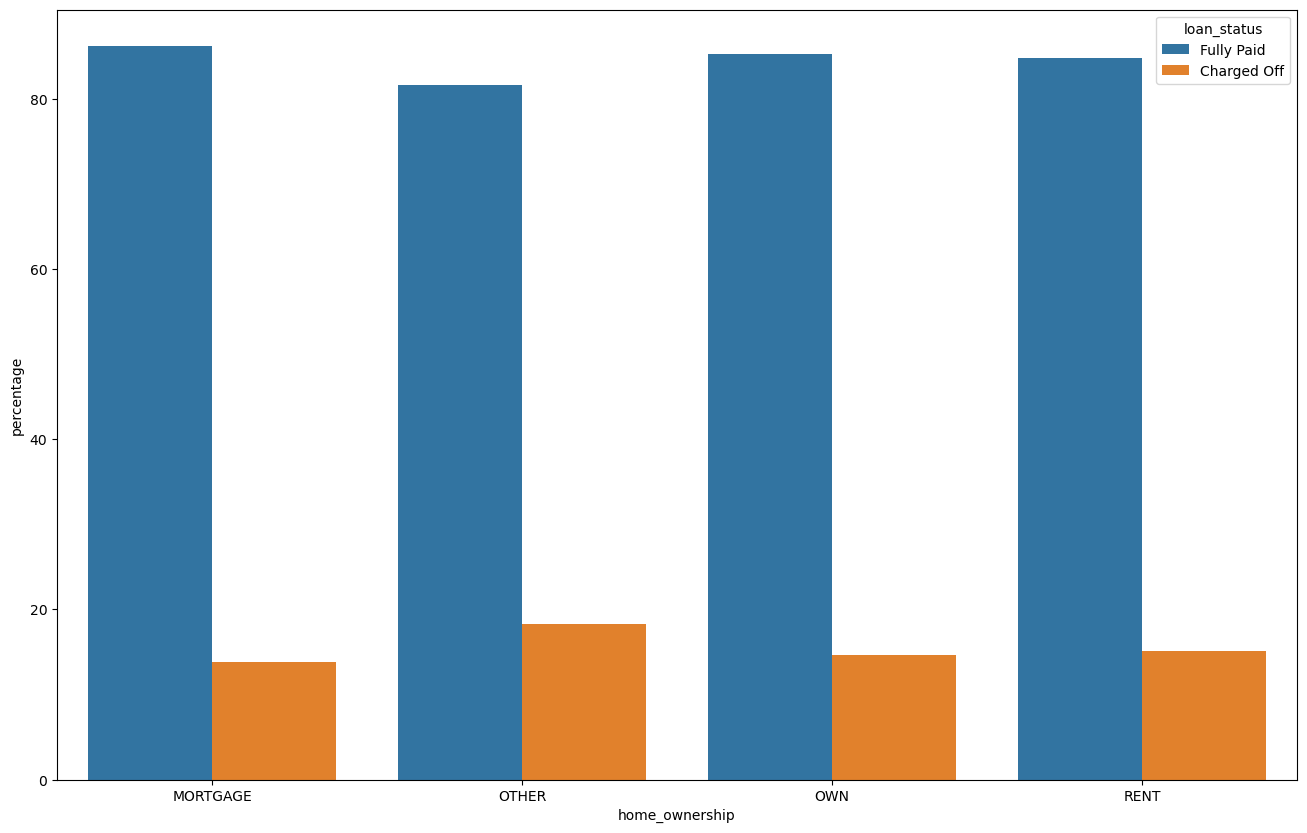

In [94]:
# plotting bar plot for home_ownership categorical data with hue as loan_status
get_graph_for_categorical_data("home_ownership")


##### verification_status 

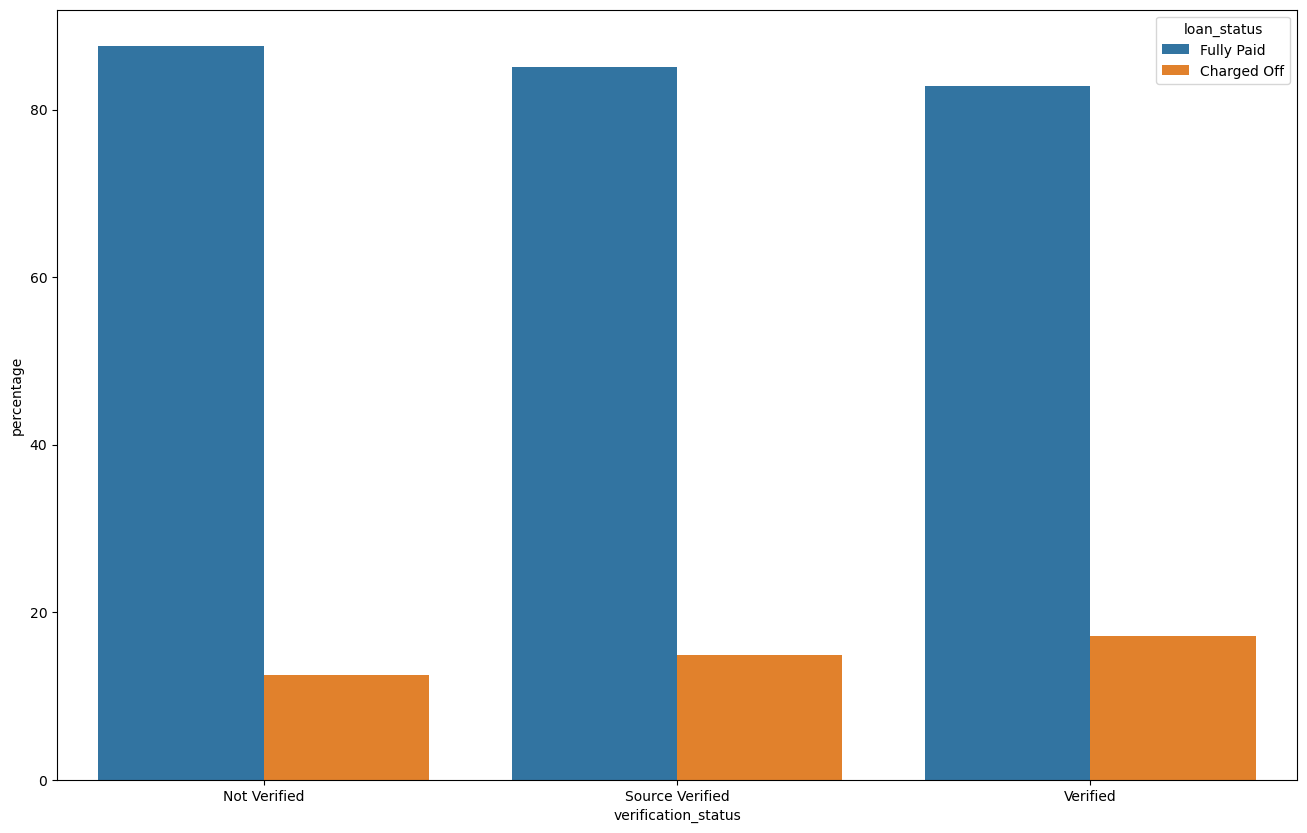

In [95]:
# plotting bar plot for verification_status categorical data with hue as loan_status
get_graph_for_categorical_data("verification_status")

```
verified income has slightly more defaults.
```

##### purpose

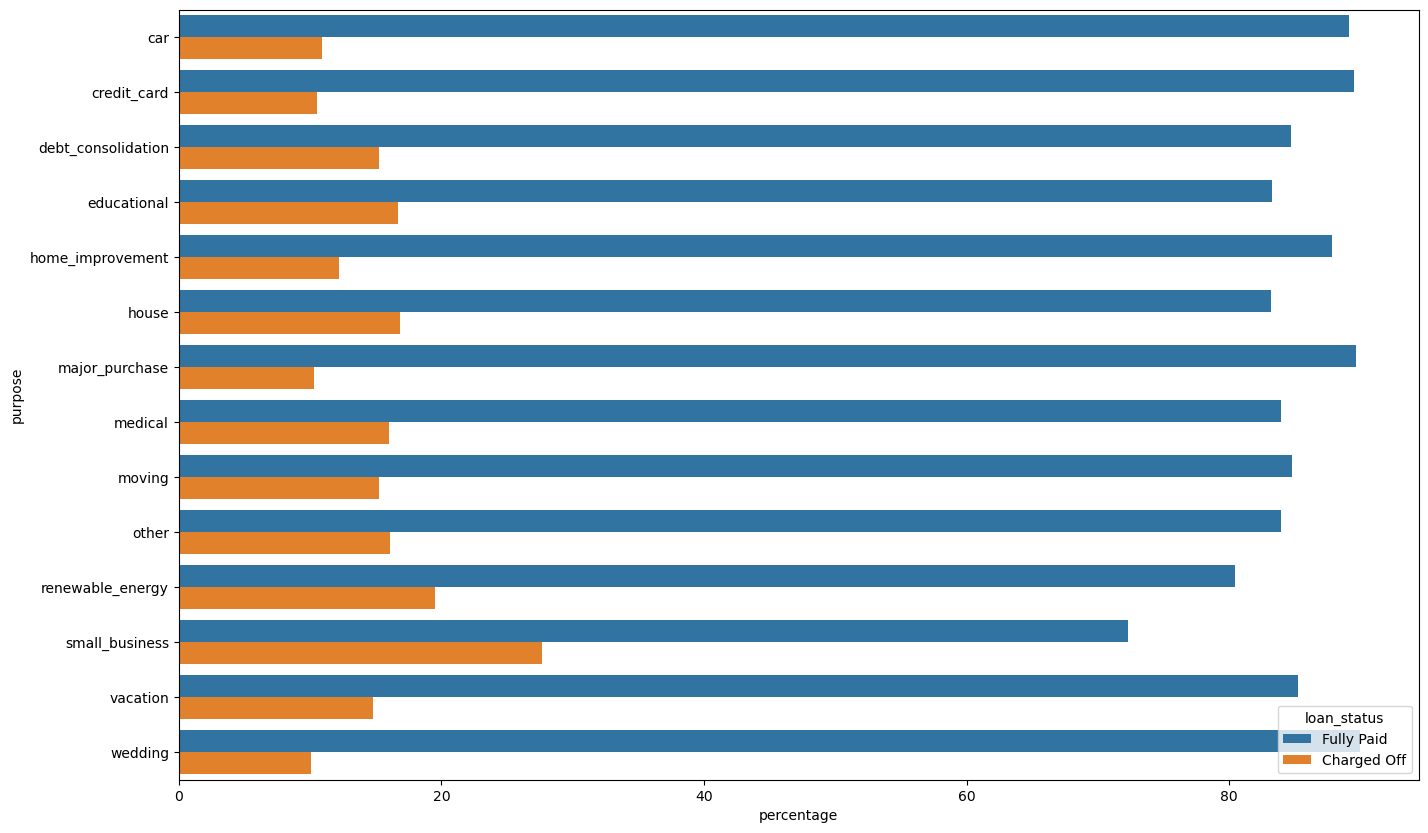

In [96]:
# plotting bar plot for purpose categorical data with hue as loan_status
get_graph_for_categorical_data("purpose",horizontal=True)


```
purpose category with value small business have higher percentage of defaults.
```

##### addr_state

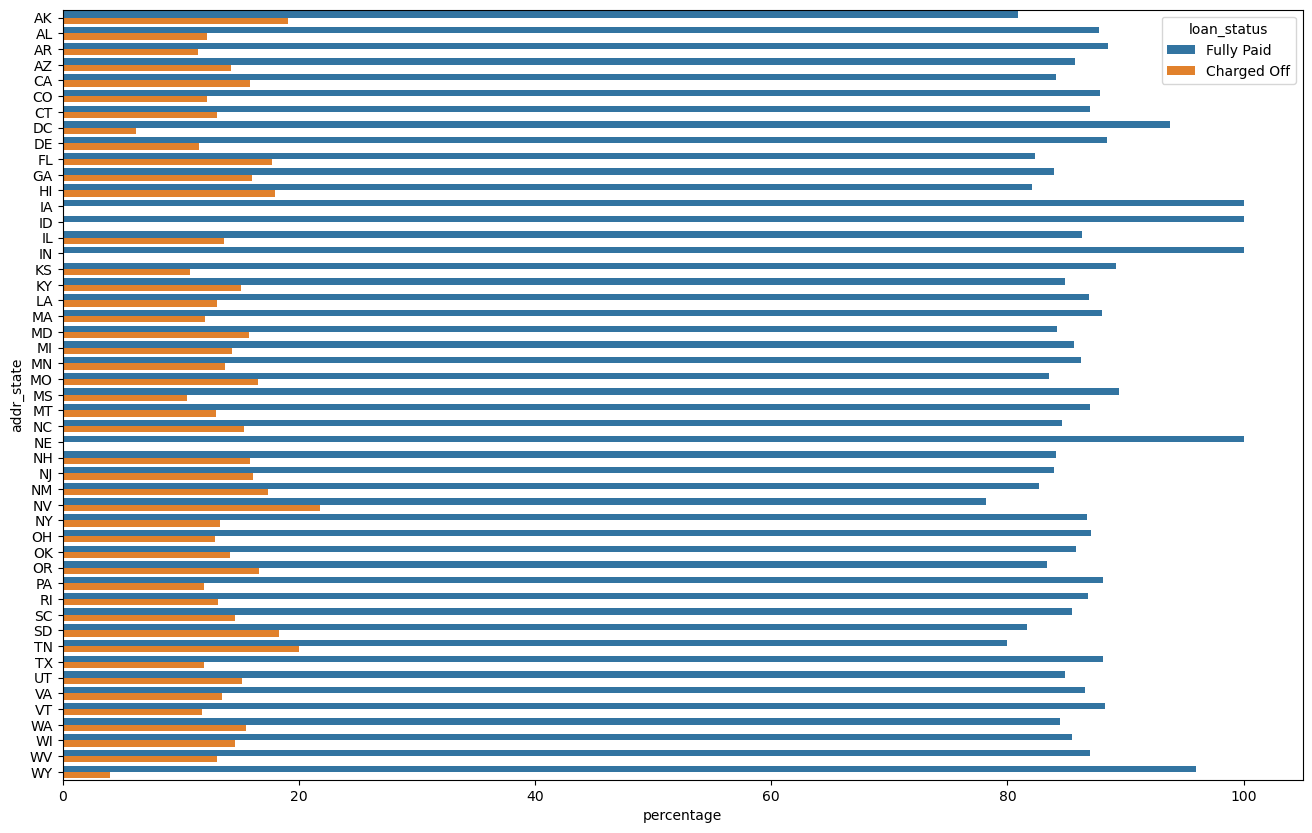

In [97]:
# plotting bar plot for addr_state categorical data with hue as loan_status
get_graph_for_categorical_data("addr_state",horizontal=True)


```
Most defaults are from addr_state NV
```

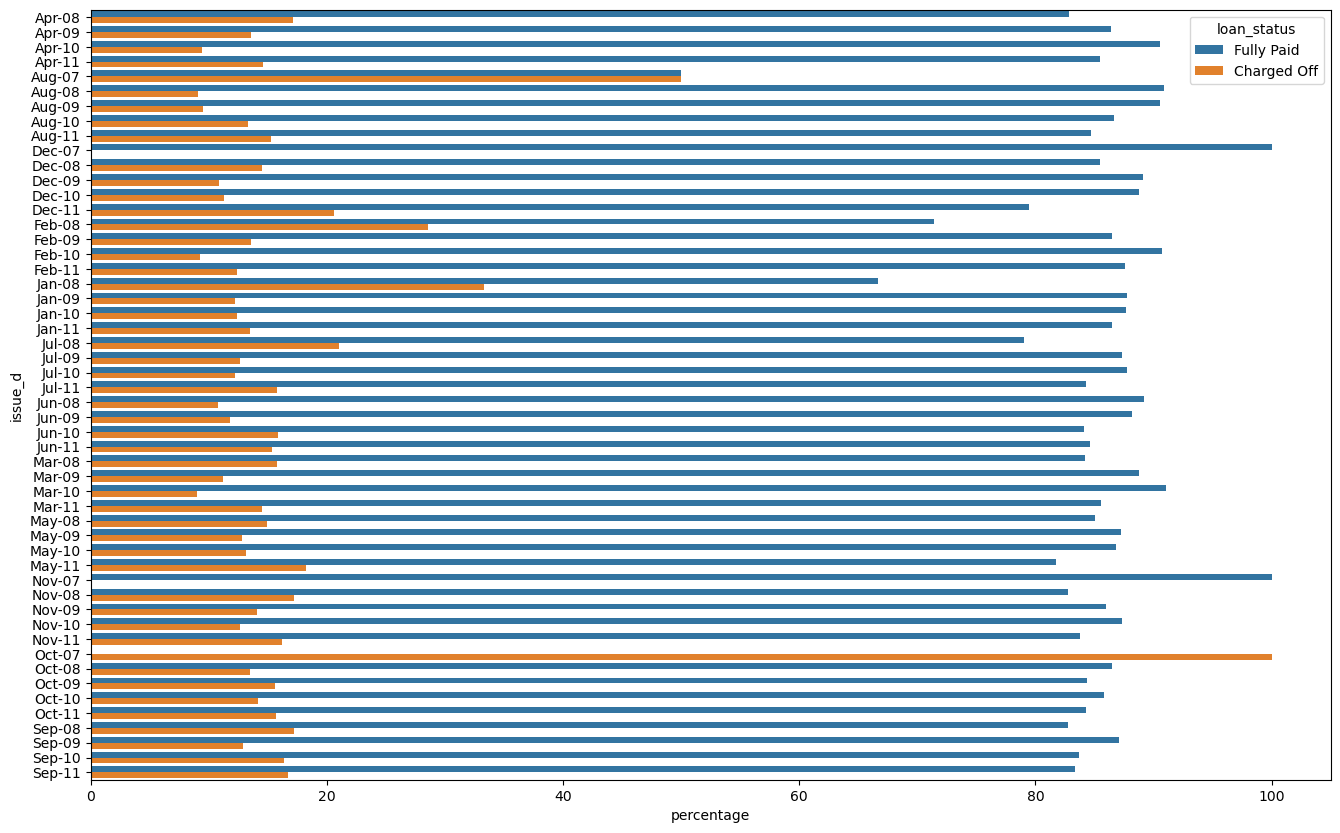

In [105]:
# plotting bar plot for issue_d categorical data with hue as loan_status
get_graph_for_categorical_data("issue_d",horizontal=True)

##### pub_rec_bankruptcies

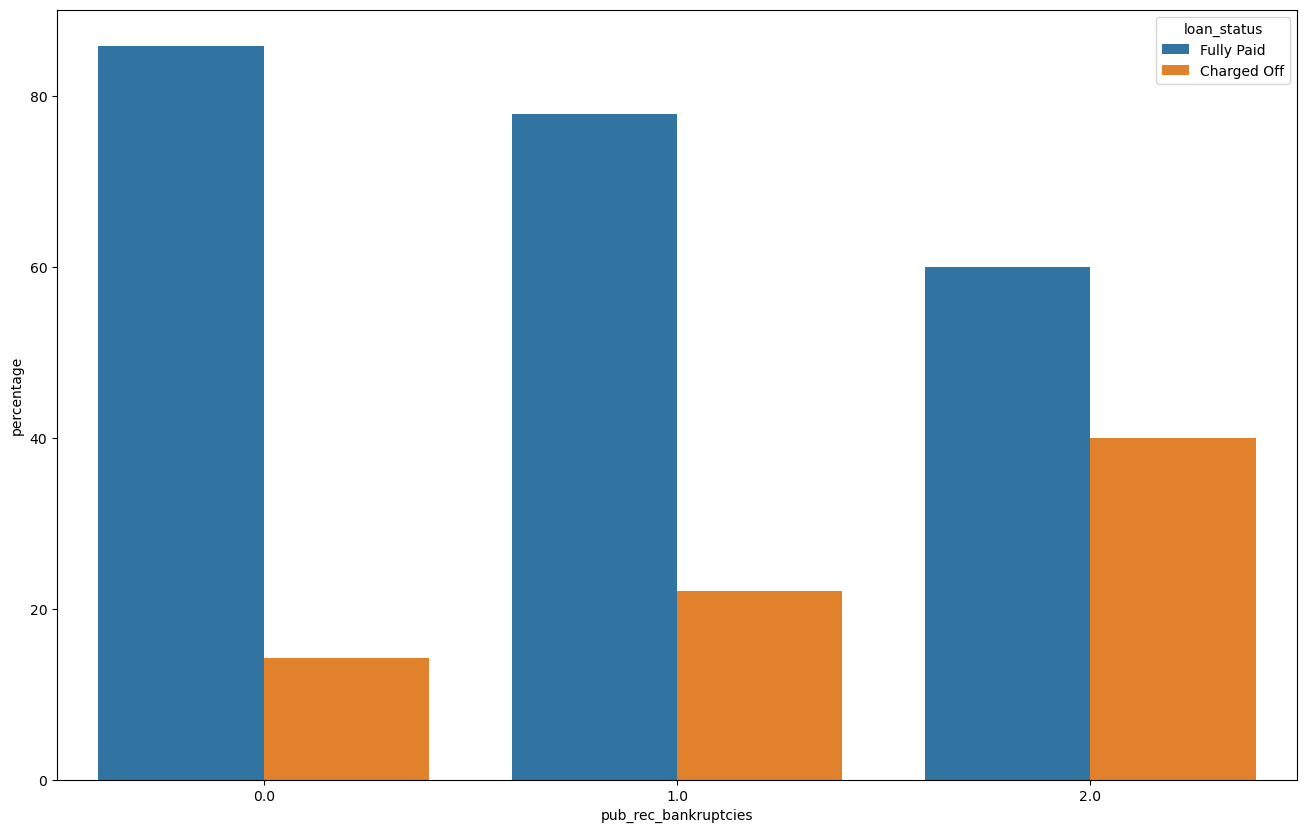

In [98]:
# plotting bar plot for pub_rec_bankruptcies categorical data with hue as loan_status
get_graph_for_categorical_data("pub_rec_bankruptcies")


```
borrowers with 2 bankruptcies have more defaults. 
```

##### installment & installments

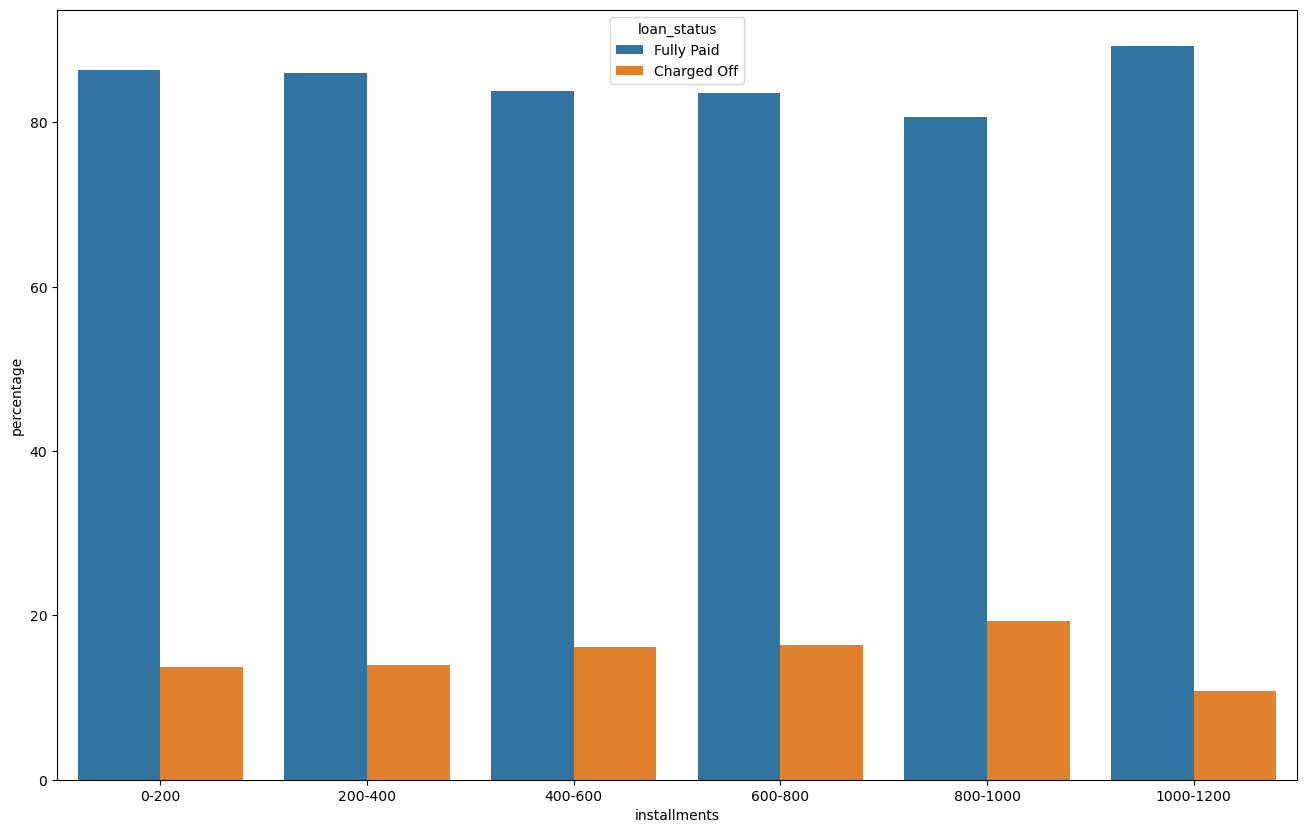

In [99]:
# plotting bar plot for installments categorical data with hue as loan_status
get_graph_for_categorical_data("installments")

```
borrowers with installment between 800 to 1000 have slightly more defaults.
```

##### annual_inc & annual_incomes

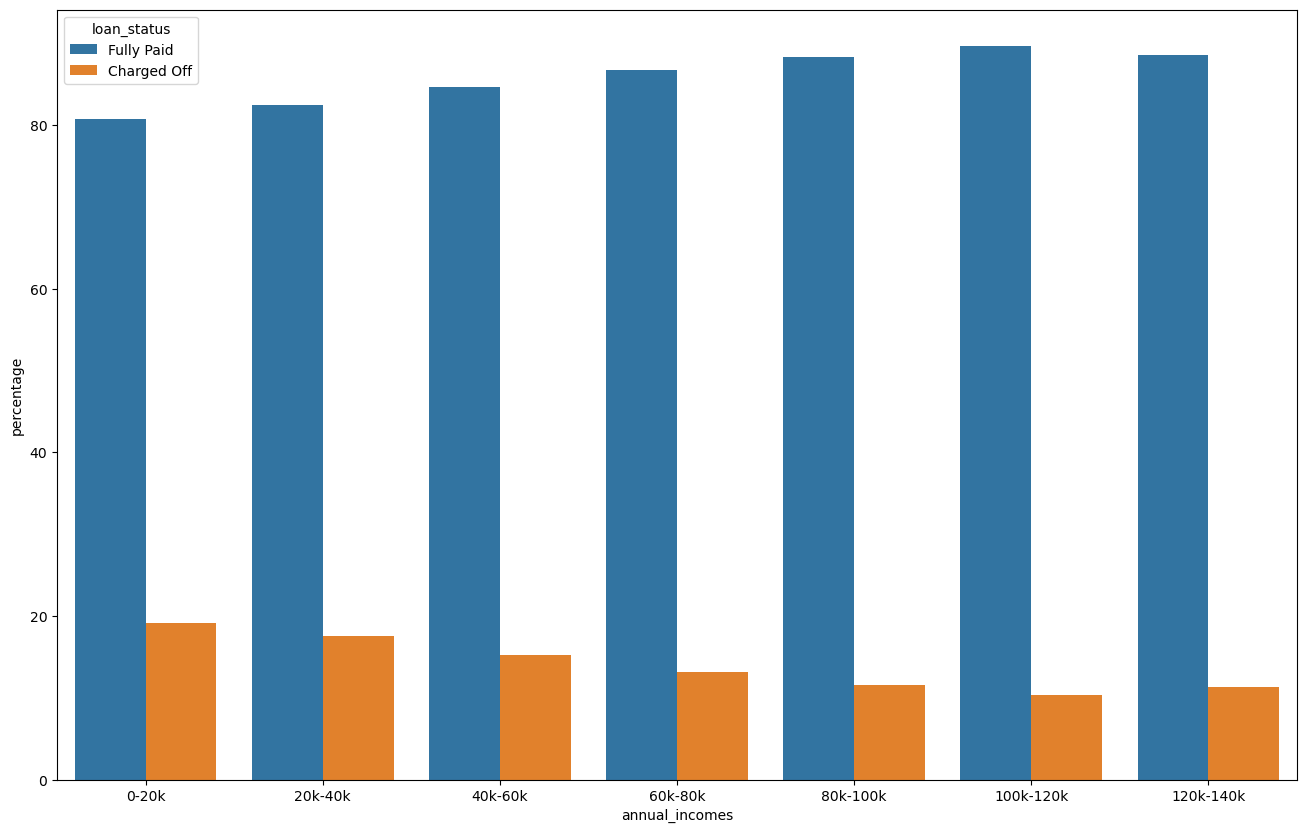

In [100]:
# plotting bar plot for annual_incomes categorical data with hue as loan_status
get_graph_for_categorical_data("annual_incomes")

```
Borrowers with annual incomes between less than 40000 have slightly more defaults. As the annual income is increasing the default rate is decreasing.
```

##### dti & dtis 

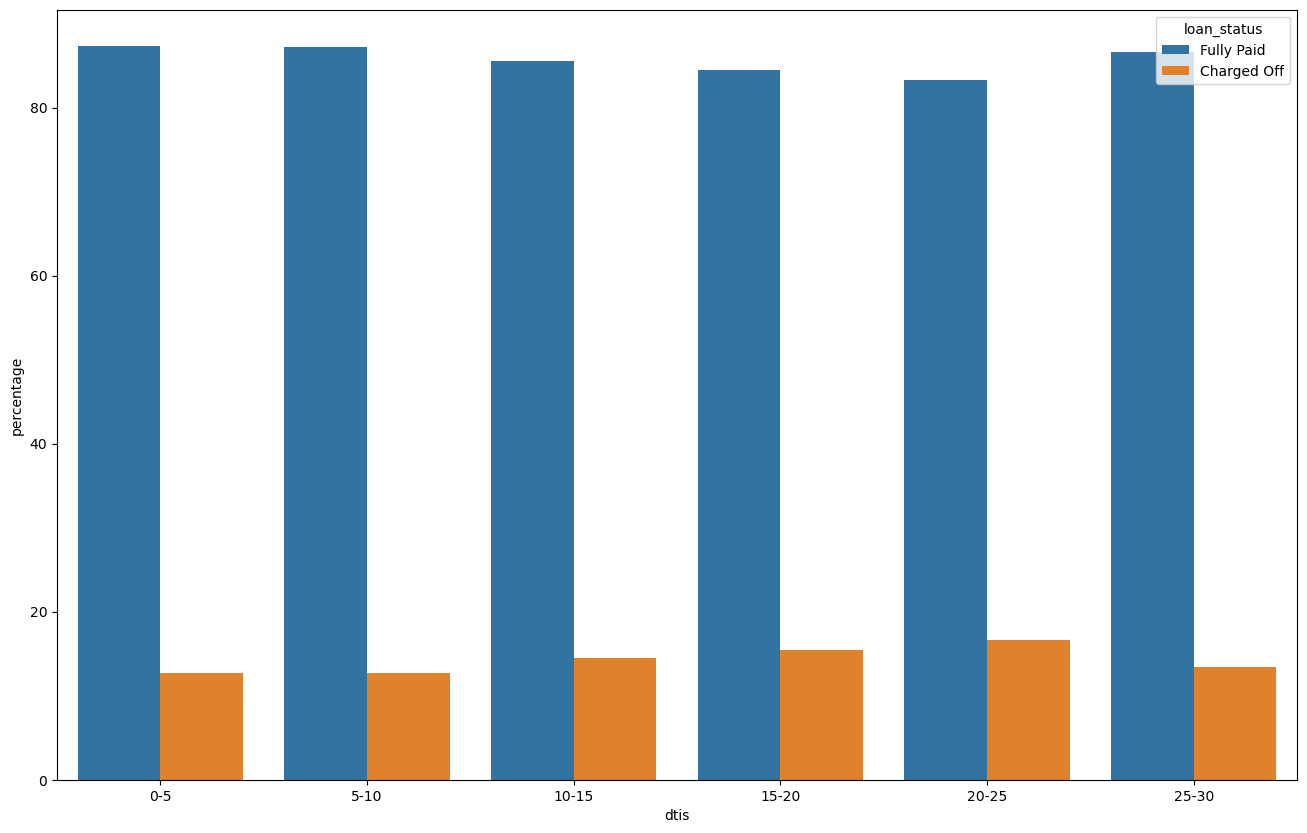

In [101]:
# plotting bar plot for dtis categorical data with hue as loan_status
get_graph_for_categorical_data("dtis")

##### int_rate & int_rates

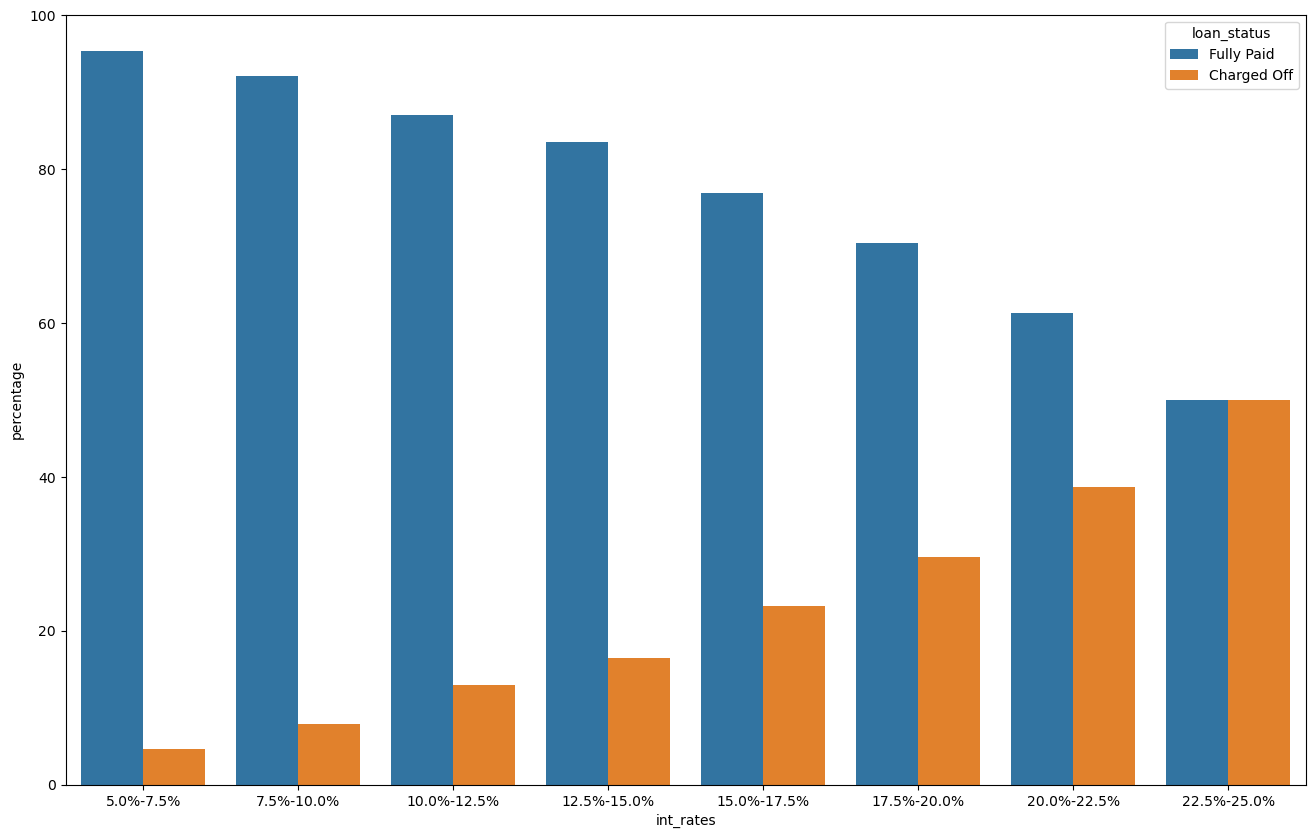

In [102]:
# plotting bar plot for int_rates categorical data with hue as loan_status
get_graph_for_categorical_data("int_rates")

```
As the interest rate is increasing the default rate is also increasing. 
```

## Insights
```
Based on the analysis done above we have come to this conclusion the following variables are the most influencial on the loan_status variable.
```

1. term - More defaults were found for loans with 60 months term than loans with 36 months term.

2. pub_rec_bankruptcies - Borrower with 1 or more bankruptcies have higher defaults.

3. int_rate - As the interest rate increases the defaults also increases.  

4. grade & sub_grade - Loans with higher grade or higher sub_grade have higher defaults. Loans with grades D and F are more prone to defaults. 

5. purpose - people with small business and renewable energy tend to default more.

6. annual_income - high % of borrowers with low income (<40k) were unable to pay the loans.